## Toxicity EDA Word Cloud
Competition location:  
https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification  
Source code location:  
https://www.kaggle.com/dborkan/benchmark-kernel  
Credits to:
https://www.kaggle.com/thousandvoices/simple-lstm
https://www.kaggle.com/nz0722/simple-eda-text-preprocessing-jigsaw

In [1]:
# !pip3 install wordcloud

In [2]:
from wordcloud import WordCloud ,STOPWORDS
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

import os
import gc

# from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import gensim

from sklearn.model_selection import KFold

from keras.layers import *
from keras.initializers import *
from keras.constraints import *
from keras.regularizers import *
from keras.activations import *
from keras.optimizers import *
import keras.backend as K
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns

# from wordcloud import WordCloud ,STOPWORDS

Using TensorFlow backend.


### Civil Comments' label rating is the civility rating Civil Comments users gave the comment.

In [3]:
train = pd.read_csv('/data/ToxicityData/train.csv')
test = pd.read_csv('/data/ToxicityData/test.csv')

In [10]:
def toxicwordcloud(subset=train[train.target>0.7], title = "Words Frequented"):
    stopword=set(STOPWORDS)
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
    wc.generate(" ".join(text))
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [5]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


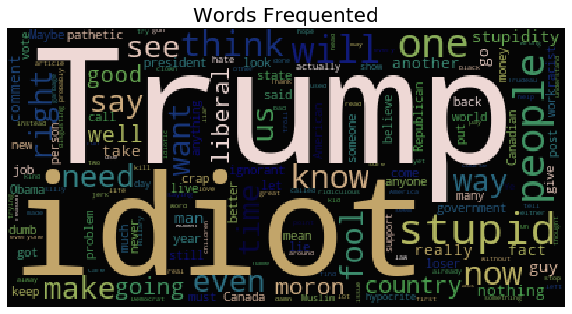

In [11]:
toxicwordcloud()

In [18]:
for i in train[train.target>0.7][:1]:
    print(i)

id
target
comment_text
severe_toxicity
obscene
identity_attack
insult
threat
asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
created_date
publication_id
parent_id
article_id
rating
funny
wow
sad
likes
disagree
sexual_explicit
identity_annotator_count
toxicity_annotator_count


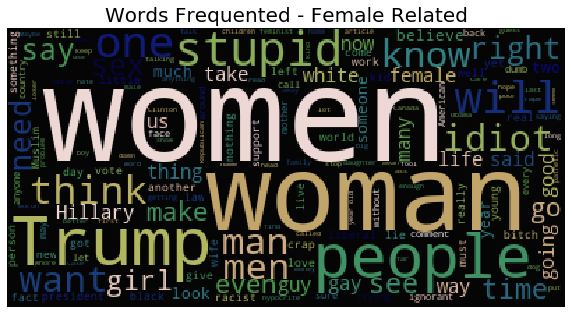

In [13]:
toxicwordcloud(subset = train[(train['female'] >0)&(train['target']>0.8)],title = "Words Frequented - Female Related")

In [20]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000, decode_error="ignore")
vectorizer.fit(X_train)

model = GaussianNB()
model.fit(dataset.data, dataset.target)